# <center> <h1>  📈 🧑‍💻 📉

## Encoding types

* One-Hot encoding - [1,0,0] [0,1,0] [0,0,1]

* Label encoding - [0,1,2,3,4]

* Binary encoding - [0,1]

In [6]:
import tensorflow as tf
import numpy as np

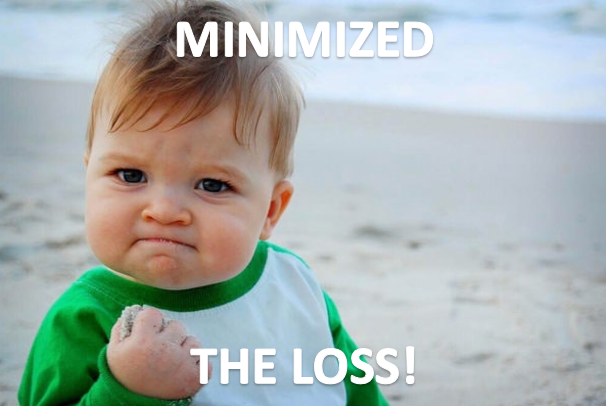

# <center> Losses

## <center> Categorical Cross entropy

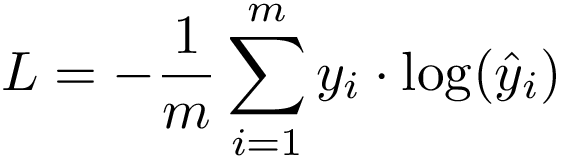

In [34]:
y_true = [[0,1,0], [0,0,1]]   # One-Hot encoding
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]] # the output value from softmax

cce = tf.keras.losses.CategoricalCrossentropy()  # default reduction="auto"
cce(y_true, y_pred).numpy()

# Values in cros entropy must be in one-hot encoding

1.1769392

In [9]:
(np.log(0.95) + np.log(0.1)) * (-1/2)
# calculation process

1.176939193690798

In [36]:
cce = tf.keras.losses.CategoricalCrossentropy(reduction="sum")
cce(y_true, y_pred).numpy()

2.3538785

In [37]:
(np.log(0.95) + np.log(0.1)) * -1

2.353878387381596

In [38]:
cce = tf.keras.losses.CategoricalCrossentropy(reduction="none")
cce(y_true, y_pred).numpy()

array([0.05129331, 2.3025851 ], dtype=float32)

In [42]:
[np.log(0.95) * -1, np.log(0.1) * -1]

[0.05129329438755058, 2.3025850929940455]

## <center> Sparse Categorical Cross entropy

In [46]:
y_true = [1, 2]    # Label encoding
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]] # the output value from softmax


scce = tf.keras.losses.SparseCategoricalCrossentropy() # default reduction="auto"
scce(y_true, y_pred).numpy()

1.1769392

In [7]:
(np.log(0.95) + np.log(0.1)) * (-1/2) #reduction="auto"
# calculation process

1.176939193690798

In [47]:
scce = tf.keras.losses.SparseCategoricalCrossentropy(reduction="sum")
scce(y_true, y_pred).numpy()

2.3538785

In [48]:
(np.log(0.95) + np.log(0.1)) * (-1)  # reduction="sum"
# calculation process

2.353878387381596

In [49]:
scce = tf.keras.losses.SparseCategoricalCrossentropy(reduction="none")
scce(y_true, y_pred).numpy()

array([0.05129344, 2.3025851 ], dtype=float32)

In [52]:
[np.log(0.95)*-1, np.log(0.1)*-1]  # reduction="none"
# calculation process

[0.05129329438755058, 2.3025850929940455]

## <center> Binary Cross entropy

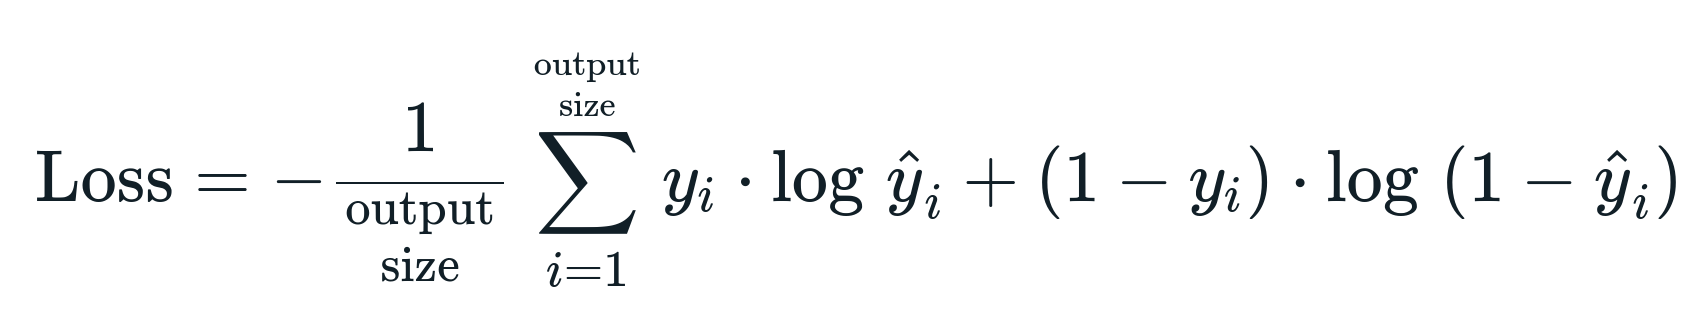

In [53]:
y_true = [1, 0, 1, 1]    # Binary encoding
y_pred = [0.87, 0.17, 0.87, 0.78]  # the output value from sigmoid

bce = tf.keras.losses.BinaryCrossentropy()  # default reduction="auto"
bce(y_true, y_pred).numpy()

# reduction="auto"  reduction="sum  reduction="none"  all the same

0.17832863

In [26]:
((1 * np.log(0.87) + (1-1) * np.log(1-0.87)) + (0 * np.log(0.17) + (1-0) * np.log(1-0.17)) + (1 * np.log(0.87) + (1-1) * np.log(1-0.87)) + (1 * np.log(0.78) + (1-1) * np.log(1-0.78))) * 1/(-4)
# calculation process


0.1783287680392521

## <center> MAE - Mean Absolute Error

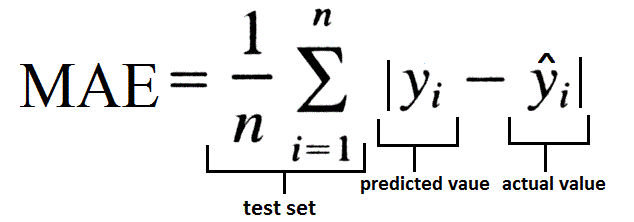

In [69]:
y_true = [80.0, 78.0, 45.0, 12.0]
y_pred = [79.0, 75.0, 46.0, 10.0]

mae = tf.keras.losses.MeanAbsoluteError()  # reduction="auto" 
mae(y_true, y_pred).numpy()

# reduction="auto"  reduction="sum  reduction="none"  all the same

1.75

In [70]:
(abs(80.0 - 79.0) + abs(78.0 - 75.0) + abs(45.0 - 46.0) + abs(12.0 - 10.0)) *1/4
# The corresponding index values are subtracted from the module, then the sum of all is calculated

1.75

In [81]:
# shipping each in a separate batch

y_true = [[80.0], [78.0], [45.0], [12.0]]
y_pred = [79.0, 75.0, 46.0, 10.0]

mae = tf.keras.losses.MeanAbsoluteError(reduction="auto")  # reduction="auto"
mae(y_true, y_pred).numpy()


30.0

In [83]:
(( abs(80-79)+abs(80-75)+abs(80-46)+abs(80-10) ) + ( abs(78-79)+abs(78-75)+abs(78-46)+abs(78-10) ) + ( abs(45-79)+abs(45-75)+abs(45-46)+abs(45-10) ) + ( abs(12-79)+abs(12-75)+abs(12-46)+abs(12-10) )) * 1/16


30.0

In [86]:
# shipping each in a separate batch

y_true = [[80.0], [78.0], [45.0], [12.0]]
y_pred = [79.0, 75.0, 46.0, 10.0]

mae = tf.keras.losses.MeanAbsoluteError(reduction="sum")  # reduction="sum"
mae(y_true, y_pred).numpy()


array([27.5, 26. , 25. , 41.5], dtype=float32)

In [85]:
(( abs(80-79)+abs(80-75)+abs(80-46)+abs(80-10) ) + ( abs(78-79)+abs(78-75)+abs(78-46)+abs(78-10) ) + ( abs(45-79)+abs(45-75)+abs(45-46)+abs(45-10) ) + ( abs(12-79)+abs(12-75)+abs(12-46)+abs(12-10) )) * 1/4


120.0

In [87]:
# shipping each in a separate batch

y_true = [[80.0], [78.0], [45.0], [12.0]]
y_pred = [79.0, 75.0, 46.0, 10.0]

mae = tf.keras.losses.MeanAbsoluteError(reduction="none")  # reduction="none"
mae(y_true, y_pred).numpy()

array([27.5, 26. , 25. , 41.5], dtype=float32)

In [91]:
[(abs(80-79)+abs(80-75)+abs(80-46)+abs(80-10) )/4, (abs(78-79)+abs(78-75)+abs(78-46)+abs(78-10))/4, (abs(45-79)+abs(45-75)+abs(45-46)+abs(45-10))/4,  (abs(12-79)+abs(12-75)+abs(12-46)+abs(12-10))/4]


[27.5, 26.0, 25.0, 41.5]

## <center> MSE - Mean Squared Error

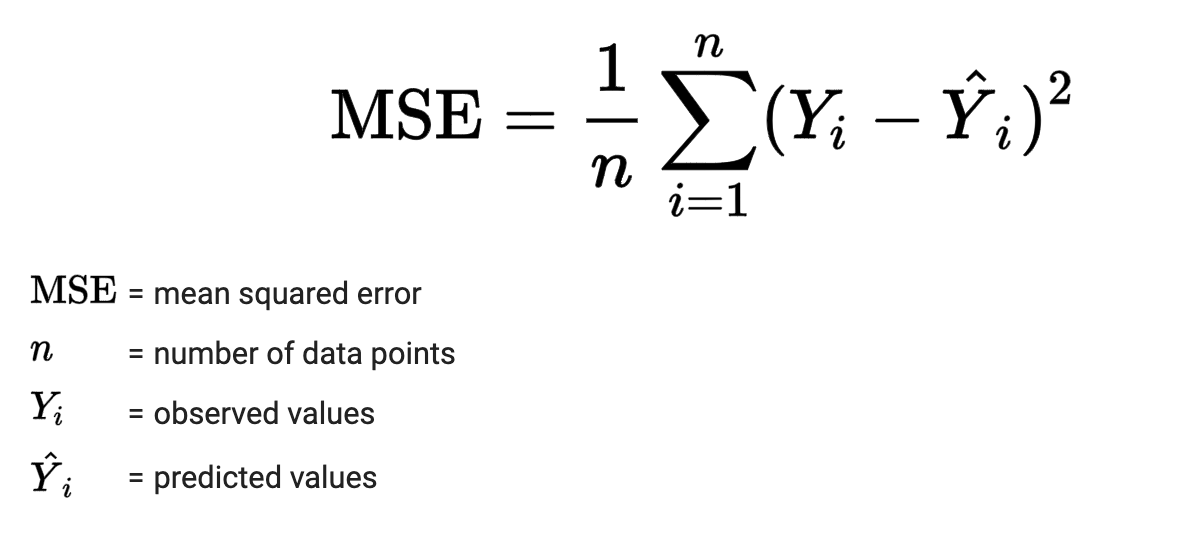

In [92]:
y_true = [80.0,78.0,45.0,12.0]
y_pred = [79.0, 75.0, 46.0, 10.0]

mse = tf.keras.losses.MeanSquaredError()
mse(y_true,y_pred).numpy()

3.75

In [93]:
((80.0 - 79.0)**2 + (78.0 - 75.0)**2 + (45.0 - 46.0)**2 + (12.0 - 10.0)**2) / 4
# corresponding indices are subtracted and raised

3.75

In [95]:
# shipping each in a separate batch
y_true = [[80.0],[78.0],[45.0],[12.0]]
y_pred = [79.0, 75.0, 46.0, 10.0]

mse = tf.keras.losses.MeanSquaredError() # reduction="auto"
mse(y_true,y_pred).numpy()

1540.0

In [116]:
(( abs(80-79)**2+abs(80-75)**2+abs(80-46)**2+abs(80-10)**2 ) + ( abs(78-79)**2+abs(78-75)**2+abs(78-46)**2+abs(78-10)**2 ) + ( abs(45-79)**2+abs(45-75)**2+abs(45-46)**2+abs(45-10)**2 ) + ( abs(12-79)**2+abs(12-75)**2+abs(12-46)**2+abs(12-10)**2 )) / 16


1540.0

In [118]:
# shipping each in a separate batch
y_true = [[80.0],[78.0],[45.0],[12.0]]
y_pred = [79.0, 75.0, 46.0, 10.0]

mse = tf.keras.losses.MeanSquaredError(reduction="sum") # reduction="sum"
mse(y_true,y_pred).numpy()

6160.0

In [119]:
(( abs(80-79)**2+abs(80-75)**2+abs(80-46)**2+abs(80-10)**2 ) + ( abs(78-79)**2+abs(78-75)**2+abs(78-46)**2+abs(78-10)**2 ) + ( abs(45-79)**2+abs(45-75)**2+abs(45-46)**2+abs(45-10)**2 ) + ( abs(12-79)**2+abs(12-75)**2+abs(12-46)**2+abs(12-10)**2 )) / 4


6160.0

In [120]:
# shipping each in a separate batch
y_true = [[80.0],[78.0],[45.0],[12.0]]
y_pred = [79.0, 75.0, 46.0, 10.0]

mse = tf.keras.losses.MeanSquaredError(reduction="none") # reduction="none"
mse(y_true,y_pred).numpy()

array([1520.5, 1414.5,  820.5, 2404.5], dtype=float32)

In [122]:
[( abs(80-79)**2+abs(80-75)**2+abs(80-46)**2+abs(80-10)**2 )/4, ( abs(78-79)**2+abs(78-75)**2+abs(78-46)**2+abs(78-10)**2 )/4, ( abs(45-79)**2+abs(45-75)**2+abs(45-46)**2+abs(45-10)**2 )/4, ( abs(12-79)**2+abs(12-75)**2+abs(12-46)**2+abs(12-10)**2 )/4]


[1520.5, 1414.5, 820.5, 2404.5]

# <center> <h1> 👨‍💻   🚀  